In [ ]:
!nvidia-smi

In [1]:
!pip install ultralytics
!pip install gdown  

!pip install zipfile-deflate64
!pip install opencv-contrib-python==4.5.5.62

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 17.2 MB/s eta 0:00:0000:0100:01


# Download Dataset 8 GB

In [2]:
import gdown
import zipfile
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2


Dataset_name = "Can"


if Dataset_name == "Can":
    # # same as the above, but with the file ID
     id = "1V-Lr_FQaysX9tlu29MQAQkeBIveDhiC6"
     zip_output = "datasets.zip"

    

# Download the file from `url` and save it locally 
if not os.path.isdir( zip_output.split(".")[0] ):
    gdown.download(id=id, output= zip_output, quiet=False)
    with zipfile.ZipFile(zip_output, 'r') as zip_ref:
        zip_ref.extractall('.')
   

# download weight

In [7]:
id = "1lydW-K8-aKV8gRBM5uMbXVpp6FDUbM4c"


zip_output = "best.pt.zip"


if not os.path.isfile("best.pt") :
        gdown.download(id=id, output= zip_output, quiet=False)

        with zipfile.ZipFile(zip_output, 'r') as zip_ref:
                zip_ref.extractall('.')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1lydW-K8-aKV8gRBM5uMbXVpp6FDUbM4c
From (redirected): https://drive.google.com/uc?id=1lydW-K8-aKV8gRBM5uMbXVpp6FDUbM4c&confirm=t&uuid=3180acca-5b9f-4119-9132-cd52aceb3815
To: /Users/tuchsanai/Documents/GitHub/temp/Celar_data/best.pt.zip
100%|██████████| 303M/303M [00:08<00:00, 35.8MB/s] 


# Train image 



In [13]:
def find_picture_files(directory):
    picture_files = []
    for dirpath, dirnames, filenames in os.walk(directory):
        for file in filenames:
            if file.lower().endswith(('.png')):
                picture_files.append(os.path.join(dirpath, file))
    return picture_files


train_picture_files = find_picture_files( "datasets/train")
test_picture_files = find_picture_files( "datasets/test")


print("Number of training pictures: ", len(train_picture_files))
print(train_picture_files[0:5])

print("Number of test pictures: ", len(test_picture_files))
print(test_picture_files[0:5])

Number of training pictures:  508
['datasets/train/images/IMG_0564.png', 'datasets/train/images/IMG_0570.png', 'datasets/train/images/IMG_0558.png', 'datasets/train/images/IMG_0612.png', 'datasets/train/images/IMG_0606.png']
Number of test pictures:  240
['datasets/test/images/IMG_3737.png', 'datasets/test/images/IMG_3723.png', 'datasets/test/images/IMG_3509.png', 'datasets/test/images/IMG_3496.png', 'datasets/test/images/IMG_3643.png']


In [15]:
from ultralytics import YOLO
import numpy as np

model = YOLO('best.pt')


image 1/1 /Users/tuchsanai/Documents/GitHub/temp/Celar_data/datasets/test/images/IMG_3783.png: 480x640 1 can, 473.2ms
Speed: 0.5ms preprocess, 473.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


Text(0.5, 1.0, 'Mask')

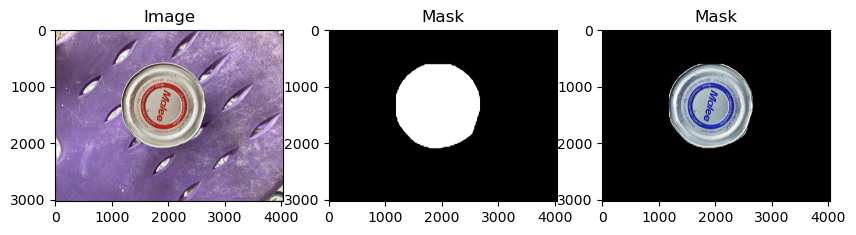

In [18]:
file = test_picture_files[70]

resutls = model.predict(file, conf=0.5,device='cpu')
result  = resutls[0]

maskimg =result.masks.data.numpy().squeeze()

import cv2
import matplotlib.pyplot as plt

# Load the image and mask
img = cv2.imread(file)


# Determine the scaling factor
scale_factor = img.shape[0] / maskimg.shape[0]

# Resize the binary mask image
resized_binary_mask = cv2.resize(maskimg, None, fx=scale_factor, fy=scale_factor)
resized_binary_mask = (resized_binary_mask*255).astype(np.uint8)


plt.figure(figsize=(10, 8))
# Plot the image
plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image')

# Plot the mask
plt.subplot(132)
plt.imshow(resized_binary_mask, cmap='gray')
plt.title('Mask')

# Plot the mask
plt.subplot(133)
plt.imshow(cv2.bitwise_and(img.copy(), img.copy(), mask=resized_binary_mask), cmap='gray')
plt.title('Mask')
  

In [1]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('best.pt')

# Open the video file
video_path = "IMG_0946.MOV"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

q    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
0: 640x384 1 can, 599.3ms
Speed: 0.5ms preprocess, 599.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x384 1 can, 7521.8ms
Speed: 0.4ms preprocess, 7521.8ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x384 1 can, 411.9ms
Speed: 0.2ms preprocess, 411.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x384 1 can, 430.4ms
Speed: 0.6ms preprocess, 430.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x384 1 can, 430.0ms
Speed: 0.4ms preprocess, 430.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x384 1 can, 420.3ms
Speed: 0.8ms preprocess, 420.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x384 1 can, 436.5ms
Speed: 0.7ms preprocess, 436.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x384 1 can, 430.9ms
Speed: 0.4ms prepro